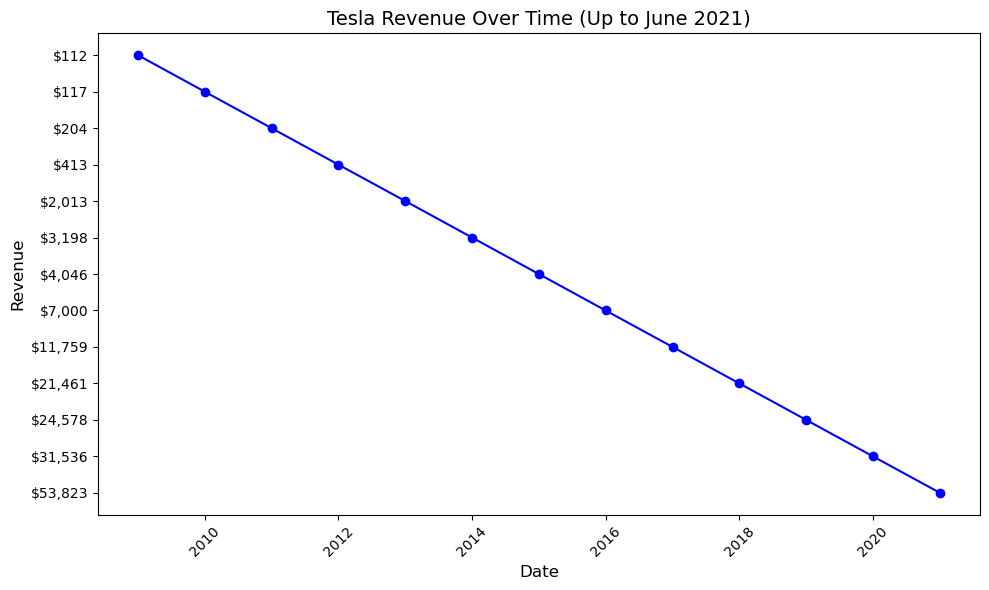

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# URL of the webpage to be downloaded
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

response = requests.get(url)
html_data = response.text

soup = BeautifulSoup(html_data, 'html.parser')

table = soup.find('table')  
rows = table.find_all('tr')

dates = []
revenues = []

# Loop through the rows and extract the date and revenue values
for row in rows[1:]:  # Skip the header row
    cols = row.find_all('td')
    if len(cols) == 2:  # Ensure there are exactly two columns (Date and Revenue)
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        
        dates.append(date)
        revenues.append(revenue)

# Create a DataFrame with the extracted data
tesla_revenue = pd.DataFrame({
    'Date': dates,
    'Revenue': revenues
})

# Display the first few rows of the DataFrame
#print(tesla_revenue.head())


# Convert the 'Date' column to datetime
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'], errors='coerce')

# Filter the data up to June 2021
tesla_revenue_filtered = tesla_revenue[tesla_revenue['Date'] <= '2021-06-30']

# Plotting the Tesla revenue data
plt.figure(figsize=(10, 6))
plt.plot(tesla_revenue_filtered['Date'], tesla_revenue_filtered['Revenue'], marker='o', color='b')

# Adding title and labels
plt.title("Tesla Revenue Over Time (Up to June 2021)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

